# Classification and Regression with a two-layer Perceptron

## Classification of linearly non-seperable data

Generation of the data

In [4]:

class Data:
    def __init__(self, mean, cov, n, change=False):
        self.mean = mean
        self.cov = cov
        self.n = n
        self.labels = []
        if change:
            self.give_distributions2()
        else:
            self.give_distributions()
        self.set_labels()
        self.set_data()

    def give_distributions(self):
        self.x = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[1])[0] 

    def give_distributions2(self):
        self.x = (np.multiply( np.random.randn(1, round(0.5*self.n)), self.cov ) - self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, round(0.5*self.n)), self.cov ) + self.mean[1])[0] 
    
    def set_labels(self):
        for i in range(0, len(self.x)):
            if self.y[i] > 0:
                self.labels.append(1.0)
            else:
                self.labels.append(-1)

    def set_data(self):
        bias = -1*np.ones(len(self.x))
        self.training_data = np.array([list(self.x), list(self.y), bias, list(self.labels)])
        self.training_data = np.transpose(self.training_data)
        # np.random.shuffle(self.training_data)
        self.X = self.training_data[:, 0:3]
        self.Y = self.training_data[:, 3]

def randomise_data(dataA, dataB):
    all_data = np.concatenate((dataA,dataB), axis=0)
    np.random.shuffle(all_data)

    inputs = all_data[:, 0:3]
    labels = all_data[:, 3:4]
    return all_data, inputs, labels

def plot_data(dataA, dataB): 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.title('Data Set A1 vs B1') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    # plt.xticks(np.arange(-3.5, 3.6, 0.5))
    # plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   


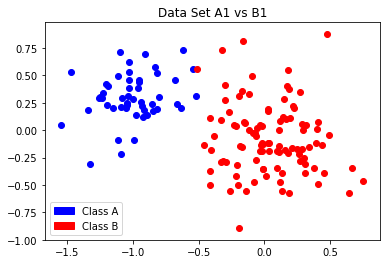

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n = 100
meanA = [1.0, 0.3]
meanB = [0.0, -0.1]
sigmaA = 0.2
sigmaB = 0.3

dataA = Data(meanA, sigmaA, n, change=True)
dataB = Data(meanB, sigmaB, n)

randomised_data, inputs, targets = randomise_data(dataA.training_data, dataB.training_data)

plot_data(dataA, dataB)

## MLP BackProp Algo

In [4]:
class MLP:
    num_inputs = 2
    num_outputs = 1
    momentum = 0.9
    
    def __init__(self, patterns, targets, num_hidden_nodes, epochs, learning_rate, step_length):
        # 1 row is all inputs
        self.patterns = patterns
        self.targets = targets
        self.num_hidden_nodes = num_hidden_nodes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.step_length = step_length 
        
        # (num_inputs+1) by (num_hidden_nodes)
        self.input_weights = np.ones((self.num_input, num_hidden_nodes))*hid_weight_inits
        # (num_hidden_nodes+1) by (num_outputs)
        self.hidden_weights = np.ones((num_hidden_nodes+1, num_outputs))*out_weight_inits
        
        
        # forward pass parameters
        self.hidden_layer_outputs = []
        self.tf_hidden_derivative = []
        self.output_layer_outputs = []
        self.tf_output_derivative = []
    
    def train(self):
        for e in range(0, self.epoch):
            self.fwd_pass()
            self.bck_pass()
            self.weight_update()
            
    def fwd_pass(self):
        self.hidden_layers_fwd_pass(self.patterns)
        self.output_layer_fwd_pass(self.hidden_layer_outputs[0])
    
    def bck_pass(self):
        self.output_error()
        self.hidden_error()
        
    def weight_update():
        # hidden weight update
        h_w_update = -self.learning_rate
    
    def hidden_layers_fwd_pass(self, inputs):
        # every row corres to hidden layer out (sample), where each col is out from a node
        h_star = np.dot(inputs, self.input_weights)
        # outputs stored in hidden_layer_outputs[0]
        self.hidden_layer_outputs.append((2/(1+np.exp(h_star))) - 1)
        
        # calc derivative, stored in tf_derivative[0]
        t1 = 1+self.hidden_layer_outputs[0]
        t2 = 1-self.hidden_layer_outputs[0]
        # derivative per node stored in columns, with each row corres to sample
        self.tf_derivative.append((t1*t2)/2)
    
    def output_layer_fwd_pass(self, inputs):
        # every row corres to hidden layer out, where each col is out from a node
        o_star = np.dot(inputs, self.hidden_weights)
        # outputs stored in hidden_layer_outputs[0]
        self.output_layer_outputs.append((2/(1+np.exp(o_star))) - 1)
        
        # calc derivative, stored in tf_derivative[0]
        t1 = 1+self.output_layer_outputs[0]
        t2 = 1-self.output_layer_outputs[0]
        self.tf_output_derivative.append((t1[0]*t2[0])/2)
        
    def output_error(self):
        # vector of delta per sample
        self.delta_o = (self.output_layer_outputs[0] - self.targets)*self.tf_output_derivative[0]
    
    def hidden_error(self):
        # output weight vec excluding bias 
        w_vec = (np.reshape(self.hidden_weights, (-1,1)))[:len(self.hidden_weights)-1,0]
        # multiplies errors corres to hid_node
        # gives mtrx with d_h1, dh_2, d_h3 .... and row per sample
        w_delta_o = self.tf_derivative*np.reshape(w_vec*sum(self.delta_o), (1,-1)))

Implement classfication using the MLP and the data non-linearly seperable data generated above.

In [10]:
patterns = False
targets = False 
num_hidden_nodes = False
epochs = False
learning_rate = False
step_length  =False

TEMPERARY = MLP(patterns, targets, num_hidden_nodes, epochs, learning_rate, step_length)

In [11]:
for i in range(0,1):
    print(i)

0


In [29]:
q = np.array([[2,5],[3,6],[4,7]])
q2 = np.array([[2,2,2],[3,3,3],[4,4,4],[5,5,5]])
x = (2/(1+np.exp(-q))) -1
x

array([[0.76159416, 0.9866143 ],
       [0.90514825, 0.99505475],
       [0.96402758, 0.9981779 ]])

In [38]:
g = []
g.append((2/(1+np.exp(q2))) - 1)
g

[array([[-0.76159416, -0.76159416, -0.76159416],
        [-0.90514825, -0.90514825, -0.90514825],
        [-0.96402758, -0.96402758, -0.96402758],
        [-0.9866143 , -0.9866143 , -0.9866143 ]])]

In [44]:
(1+g[0])

array([[0.23840584, 0.23840584, 0.23840584],
       [0.09485175, 0.09485175, 0.09485175],
       [0.03597242, 0.03597242, 0.03597242],
       [0.0133857 , 0.0133857 , 0.0133857 ]])

In [45]:
(1-g[0])

array([[1.76159416, 1.76159416, 1.76159416],
       [1.90514825, 1.90514825, 1.90514825],
       [1.96402758, 1.96402758, 1.96402758],
       [1.9866143 , 1.9866143 , 1.9866143 ]])

In [46]:
(1+g[0])*(1-g[0])

array([[0.41997434, 0.41997434, 0.41997434],
       [0.18070664, 0.18070664, 0.18070664],
       [0.07065082, 0.07065082, 0.07065082],
       [0.02659223, 0.02659223, 0.02659223]])

In [49]:
(1+g[0])*(1-g[0])/2

array([[0.20998717, 0.20998717, 0.20998717],
       [0.09035332, 0.09035332, 0.09035332],
       [0.03532541, 0.03532541, 0.03532541],
       [0.01329611, 0.01329611, 0.01329611]])

In [69]:
q = np.array([[2],[3],[4]])
q[:len(q)-1,0]

array([2, 3])

In [60]:
len(q)

3

In [71]:
q = np.array([[2,3,4]])
q*q

array([[ 4,  9, 16]])